In [ ]:
# 구글 드라이브 연동

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 사용 GPU 확인
!nvidia-smi

Fri Nov  4 06:12:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# # folder 폴더에 dataset.zip 압축 해제하기

%cd /content/drive/MyDrive/folder
!unzip /content/drive/MyDrive/folder/dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: L2_41/yxtxwawodpbozadexchs.jpg  
  inflating: L2_41/pnfztlmerrrkqmeqqmme.jpg  
  inflating: L2_41/nargedsqusnkzkfwxkje.jpg  
  inflating: L2_41/szfqmropzcaevghrilke.jpg  
  inflating: L2_41/dmqdwsedrcydkmniydlw.png  
  inflating: L2_41/jhfbjiefvhimqhblihgj.jpg  
  inflating: L2_41/erqrzkapkbjskpdgmgeh.jpg  
  inflating: L2_41/issjlcvsyadjelkqdych.jpg  
  inflating: L2_41/lhmtveghjnczgguytlqx.jpg  
  inflating: L2_41/dzoinzzrxkktpyjgazmr.jpg  
  inflating: L2_41/psjensoqzdgrmwwnmaop.jpg  
  inflating: L2_41/akwgwqeazpoirdpdiplp.jpg  
  inflating: L2_41/rgtvdtvohahvrtidkxps.jpg  
  inflating: L2_41/nocnjcllyvpopxvpbqer.jpg  
  inflating: L2_41/obwtgqsnstfogxrmlsca.jpg  
  inflating: L2_41/cbvovkwrqylgmezmamul.jpg  
  inflating: L2_41/vvyepihfifiskyaqyzqy.jpg  
  inflating: L2_41/lorobaasojdhjxztszez.jpg  
  inflating: L2_41/zoxytlgfkachqggmzqps.jpg  
  inflating: L2_41/qhvwlqedegadcbuayica.jpg  
  inflating: L2_41/qozsgcdqngvezpvgnwur.jpg 

In [ ]:
from torchvision import datasets, models, transforms
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt

In [ ]:
# PyTorch GPU 연결
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# ImageFolder 메소드로 폴더별 클래스 구분

path = '/content/drive/MyDrive/folder'

data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

image_datasets = datasets.ImageFolder(path, data_transforms)
print(image_datasets)
class_names = image_datasets.classes # 각 클래스의 이름을 class_names에 저장

Dataset ImageFolder
    Number of datapoints: 25503
    Root location: /content/drive/MyDrive/folder
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


**Mission #1 & #2 - EDA 수행 및 문제점 도출**

In [ ]:
# 데이터 분포 EDA (불균형 확인)

import os

class_freq = {}
for n in class_names:
  freq = len(os.listdir(path +  '/' + n))
  print('%s 클래스 이미지 개수: %d' % (n, freq))
  class_freq[n] = freq

L2_10 클래스 이미지 개수: 1893
L2_12 클래스 이미지 개수: 518
L2_15 클래스 이미지 개수: 1509
L2_20 클래스 이미지 개수: 410
L2_21 클래스 이미지 개수: 410
L2_24 클래스 이미지 개수: 782
L2_25 클래스 이미지 개수: 6189
L2_27 클래스 이미지 개수: 426
L2_3 클래스 이미지 개수: 595
L2_30 클래스 이미지 개수: 364
L2_33 클래스 이미지 개수: 6206
L2_34 클래스 이미지 개수: 419
L2_39 클래스 이미지 개수: 454
L2_40 클래스 이미지 개수: 180
L2_41 클래스 이미지 개수: 593
L2_44 클래스 이미지 개수: 547
L2_45 클래스 이미지 개수: 631
L2_46 클래스 이미지 개수: 2214
L2_50 클래스 이미지 개수: 781
L2_52 클래스 이미지 개수: 382


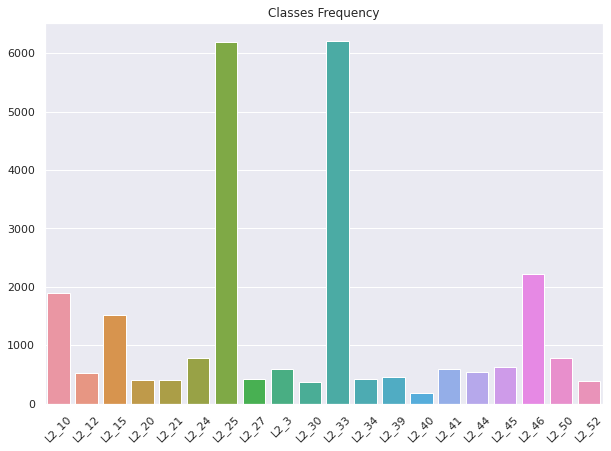

In [ ]:
# 데이터 분포 시각화 -> 불균형 확인

import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize':(10,7)})
plt.xticks(rotation = 45)
plt.title("Classes Frequency")
sns.barplot(data=pd.DataFrame(class_freq, index = [0]))
plt.show()

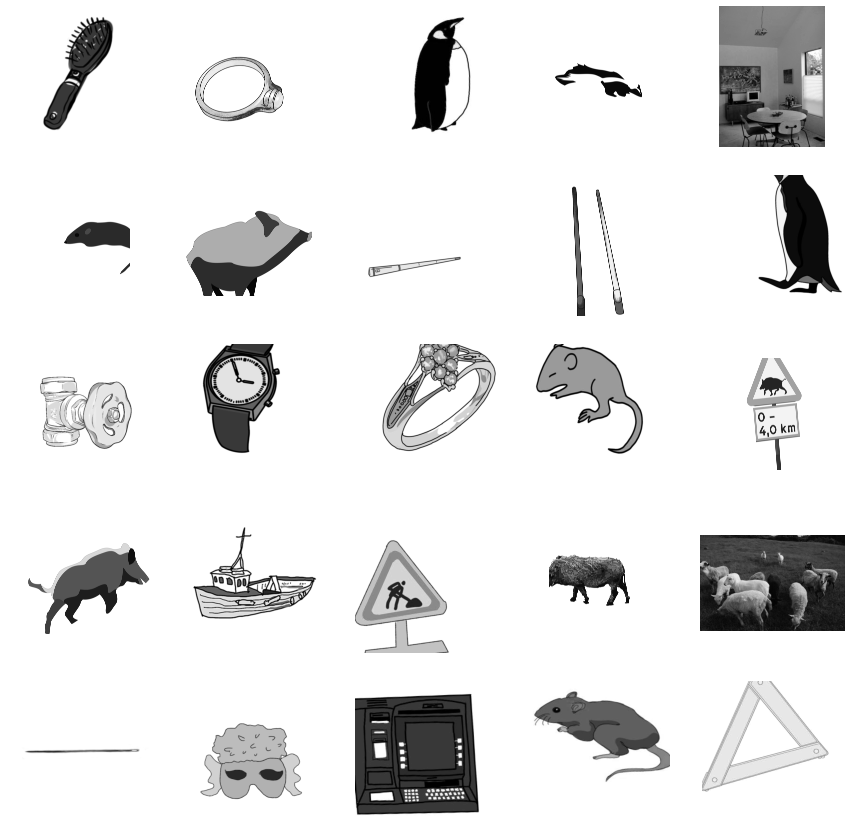

In [ ]:
# 데이터 랜덤 추출 -> 실사 이미지 포함 확인
import random

plt.figure(figsize=(15,15))
for i, rii in enumerate(random.sample(range(25503), 25)):
  plt.subplot(5, 5, i + 1)
  real_test = image_datasets.__getitem__(rii)
  plt.imshow(real_test[0].permute(1,2,0)[:,:,0], cmap='gray')
  plt.axis('off')
plt.show()

**Mission #2 - 실사 이미지 제거**

In [ ]:
# object가 2개 이상이면 실사이미지로 판단한다.

# 주형 1

# !pip install cvlib
from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_1 = []
real_image_path_1 = []

conf = 0.5
model_name ='yolov4'

for i in range(2000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_1.append(i)
    real_image_path_1.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_1))
print(real_image_index_1)
print(real_image_path_1)

In [ ]:
# 주형 2

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_2 = []
real_image_path_2 = []

conf = 0.5
model_name ='yolov4'

for i in range(2000,4000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_2.append(i)
    real_image_path_2.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_2))
print(real_image_index_2)
print(real_image_path_2)

In [ ]:
# 주형 3

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_3 = []
real_image_path_3 = []

conf = 0.5
model_name ='yolov4'

for i in range(4000, 6000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_3.append(i)
    real_image_path_3.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_3))
print(real_image_index_3)
print(real_image_path_3)

In [ ]:
# 혜경 1

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_4 = []
real_image_path_4 = []

conf = 0.5
model_name ='yolov4'

for i in range(6000, 8000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_4.append(i)
    real_image_path_4.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_4))
print(real_image_index_4)
print(real_image_path_4)

In [ ]:
# 혜경 2

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_5 = []
real_image_path_5 = []

conf = 0.5
model_name ='yolov4'

for i in range(8000, 10000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_5.append(i)
    real_image_path_5.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_5))
print(real_image_index_5)
print(real_image_path_5)

In [ ]:
# 혜경 3

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_6 = []
real_image_path_6 = []

conf = 0.5
model_name ='yolov4'

for i in range(10000, 12000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_6.append(i)
    real_image_path_6.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_6))
print(real_image_index_6)
print(real_image_path_6)

In [ ]:
# 찬우 1

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_7 = []
real_image_path_7 = []

conf = 0.5
model_name ='yolov4'

for i in range(12000, 14000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_7.append(i)
    real_image_path_7.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_7))
print(real_image_index_7)
print(real_image_path_7)

In [ ]:
# 찬우 2

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_8 = []
real_image_path_8 = []

conf = 0.5
model_name ='yolov4'

for i in range(14000, 16000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_8.append(i)
    real_image_path_8.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_8))
print(real_image_index_8)
print(real_image_path_8)

In [ ]:
# 찬우 3

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_9 = []
real_image_path_9 = []

conf = 0.5
model_name ='yolov4'

for i in range(16000, 18000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_9.append(i)
    real_image_path_9.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_9))
print(real_image_index_9)
print(real_image_path_9)

In [ ]:
# 지훈 1

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_10 = []
real_image_path_10 = []

conf = 0.5
model_name ='yolov4'

for i in range(18000, 20000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_10.append(i)
    real_image_path_10.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_10))
print(real_image_index_10)
print(real_image_path_10)

In [ ]:
# 지훈 2

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_11 = []
real_image_path_11 = []

conf = 0.5
model_name ='yolov4'

for i in range(20000, 22000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_11.append(i)
    real_image_path_11.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_11))
print(real_image_index_11)
print(real_image_path_11)

In [ ]:
# 지훈 3

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_12 = []
real_image_path_12 = []

conf = 0.5
model_name ='yolov4'

for i in range(22000, 24000):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_12.append(i)
    real_image_path_12.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_12))
print(real_image_index_12)
print(real_image_path_12)

In [ ]:
# 먼저 한 사람이 돌려보기

from IPython.display import Image, display
import cv2
import cvlib as cv
import os
import matplotlib.pyplot as plt

real_image_index_13 = []
real_image_path_13 = []

conf = 0.5
model_name ='yolov4'

for i in range(24000, len(image_datasets)):
  img = cv2.imread(image_datasets.imgs[i][0])
  result = cv.detect_common_objects(img, confidence=conf, model=model_name)
  if len(result[0]) > 1:
    real_image_index_13.append(i)
    real_image_path_13.append(image_datasets.imgs[i][0])

print("최종 구분된 실사이미지 개수: ", len(real_image_index_13))
print(real_image_index_13)
print(real_image_path_13)

In [ ]:
real_image_index = real_image_index_1 + real_image_index_2 + real_image_index_3 + real_image_index_4 + real_image_index_5 + real_image_index_6 + real_image_index_7 + real_image_index_8 + real_image_index_9 + real_image_index_10 + real_image_index_11 + real_image_index_12 + real_image_index_13
real_image_path = real_image_path_1 + real_image_path_2 + real_image_path_3 + real_image_path_4 + real_image_path_5 +real_image_path_6 + real_image_path_7 + real_image_path_8 + real_image_path_9 + real_image_path_10 + real_image_path_11 + real_image_path_12 + real_image_path_13

print(len(real_image_index))
print(real_image_index)
print(real_image_path)

In [ ]:
print(len(real_image_index))

In [ ]:
path = '/content/drive/MyDrive/folder'

data_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1) , # 흑백 이미지
    transforms.Resize((80, 80)),
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

image = torchvision.datasets.ImageFolder(root = path, transform = data_transforms)

In [ ]:
real_image_index_final = []
illust_image_index = []
cnt=0
for i in real_image_index:
  c = 0
  a = image.__getitem__(i)
  if a[0][0][0].mean().numpy() == a[0][0][1].mean().numpy():
    c += 1
  if a[0][0][-1].mean().numpy() == a[0][0][-2].mean().numpy():
    c += 1
  if torch.transpose(a[0][0], 0, 1)[0].mean().numpy() == torch.transpose(a[0][0], 0, 1)[1].mean().numpy():
    c += 1
  if torch.transpose(a[0][0], 0, 1)[-1].mean().numpy() == torch.transpose(a[0][0], 0, 1)[-2].mean().numpy():
    c += 1
  if c < 2: # 두줄 같은 게 0개나 1개면 실사 이미지
    cnt+=1
    real_image_index_final.append(i)
  else: # 두 줄 같은 게 2개 이상이면 추상이미지
    illust_image_index.append(i)
print(len(real_image_index_final))
print(len(illust_image_index))

In [ ]:
# 미리 저장된 인덱스

real_image_index_final = [1894, 1895, 1896, 1897, 1898, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1911, 1913, 1914, 1915, 1916, 1918, 1919, 1920, 1921, 1922, 1924, 1925, 1926, 1927, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1946, 1953, 1954, 1956, 1957, 1959, 1962, 1963, 1964, 1967, 1968, 1970, 1972, 1973, 1974, 1975, 1978, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1991, 1992, 1993, 1994, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2011, 2013, 2014, 2018, 2019, 2021, 2022, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2053, 2054, 2056, 2057, 2060, 2061, 2063, 2066, 2067, 2069, 2070, 2072, 2074, 2075, 2077, 2078, 2079, 2080, 2082, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2096, 2098, 2099, 2102, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2117, 2118, 2120, 2121, 2122, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2181, 2183, 2185, 2187, 2188, 2189, 2190, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2201, 2202, 2203, 2204, 2205, 2207, 2208, 2210, 2211, 2212, 2213, 2215, 2218, 2220, 2221, 2222, 2225, 2228, 2229, 2232, 2233, 2234, 2235, 2236, 2238, 2239, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2251, 2253, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2266, 2267, 2270, 2271, 2272, 2273, 2274, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2314, 2315, 2316, 2317, 2320, 2321, 2323, 2324, 2325, 2326, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2339, 2340, 2341, 2342, 2343, 2344, 2347, 2348, 2349, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2364, 2365, 2368, 2371, 2372, 2374, 2377, 2378, 2379, 2381, 2382, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2392, 2393, 2394, 2395, 2396, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2407, 2409, 3348, 4741, 4742, 4744, 4745, 4752, 4753, 4755, 4756, 4759, 4766, 4770, 4771, 4776, 4784, 4786, 4787, 4790, 4795, 4796, 4797, 4798, 4800, 4810, 4812, 4814, 4817, 4822, 4825, 4828, 4830, 4831, 4832, 4839, 4840, 4842, 4843, 4845, 4846, 4847, 4854, 4855, 4856, 4859, 4860, 4861, 4862, 4863, 4866, 4867, 4868, 4869, 4870, 4874, 4877, 4879, 4884, 4887, 4888, 4889, 4890, 4892, 4894, 4895, 4896, 4897, 4898, 4899, 4901, 4906, 4909, 4910, 4913, 4914, 4921, 4924, 4925, 4928, 4931, 4934, 4935, 4936, 4938, 4939, 4941, 4942, 4944, 4945, 4946, 4951, 4952, 4953, 4955, 4957, 4963, 4964, 4965, 4969, 4972, 4976, 4979, 4980, 4981, 4986, 4991, 4993, 4996, 4997, 4999, 5002, 5006, 5007, 5008, 5011, 5012, 5017, 5019, 5022, 5024, 5027, 5028, 5029, 5032, 5034, 5035, 5036, 5040, 5041, 5045, 5046, 5047, 5048, 5050, 5051, 5053, 5054, 5055, 5057, 5061, 5067, 5071, 5072, 5073, 5079, 5082, 5084, 5085, 5086, 5087, 5089, 5092, 5093, 5097, 5099, 5103, 5109, 5112, 5113, 5116, 5118, 5122, 5124, 5125, 5126, 5127, 5129, 5135, 5136, 5137, 5141, 5142, 5143, 5145, 5147, 5148, 5155, 5156, 5158, 5159, 5160, 5161, 5162, 5164, 5165, 5167, 5168, 5169, 5170, 5173, 5174, 5175, 5180, 5181, 5183, 5184, 5185, 5187, 5191, 5192, 5193, 5196, 5199, 5200, 5203, 5205, 5206, 5208, 5209, 5211, 5214, 5215, 5216, 5218, 5219, 5223, 5226, 5228, 5230, 5231, 5232, 5235, 5243, 5245, 5247, 5248, 5250, 5252, 5253, 5262, 5264, 5266, 5274, 5276, 5278, 5280, 5283, 5284, 5285, 5286, 5287, 5289, 5291, 5296, 5299, 5302, 5303, 5306, 5307, 5308, 5310, 5313, 5316, 5319, 5321, 5322, 5323, 5326, 5332, 5335, 5340, 5344, 5345, 5347, 5348, 5350, 5351, 5354, 5357, 5359, 5360, 5361, 5363, 5364, 5365, 5366, 5369, 5370, 5374, 5377, 5378, 5382, 5383, 5387, 5390, 5391, 5393, 5394, 5395, 5399, 5402, 5404, 5405, 5406, 5407, 5410, 5412, 5413, 5415, 5418, 5420, 5421, 5422, 5423, 5426, 5429, 5431, 5432, 5433, 5435, 5437, 5438, 5440, 5443, 5445, 5447, 5448, 5449, 5453, 5454, 5455, 5456, 5458, 5459, 5460, 5461, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5471, 5472, 5475, 5481, 5482, 5483, 5485, 5487, 5488, 5489, 5490, 5491, 5492, 5493, 5498, 5499, 5500, 5501, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5510, 5511, 5514, 5515, 5517, 12137, 12138, 12139, 12140, 12141, 12144, 12145, 12148, 12152, 12154, 12155, 12156, 12158, 12160, 12161, 12162, 12164, 12165, 12166, 12168, 12169, 12170, 12171, 12172, 12173, 12174, 12175, 12179, 12181, 12182, 12183, 12184, 12185, 12188, 12189, 12190, 12191, 12192, 12193, 12194, 12195, 12196, 12197, 12200, 12201, 12205, 12206, 12207, 12208, 12209, 12210, 12211, 12212, 12213, 12215, 12216, 12221, 12223, 12224, 12225, 12227, 12228, 12229, 12230, 12232, 12233, 12238, 12239, 12240, 12242, 12244, 12245, 12247, 12248, 12249, 12250, 12251, 12253, 12254, 12255, 12256, 12257, 12258, 12259, 12261, 12264, 12265, 12267, 12268, 12269, 12270, 12271, 12272, 12274, 12275, 12276, 12278, 12282, 12286, 12290, 12291, 12294, 12295, 12296, 12298, 12301, 12302, 12303, 12305, 12306, 12307, 12310, 12311, 12313, 12315, 12316, 12317, 12318, 12319, 12320, 12321, 12322, 12324, 12326, 12327, 12329, 12330, 12332, 12339, 12341, 12342, 12346, 12347, 12348, 12350, 12352, 12354, 12355, 12356, 12357, 12358, 12359, 12360, 12361, 12363, 12364, 12365, 12366, 12368, 12370, 12371, 12372, 12377, 12378, 12379, 12381, 12382, 12384, 12385, 12386, 12387, 12389, 12390, 12391, 12392, 12394, 12395, 12398, 12400, 12401, 12404, 12405, 12406, 12408, 12409, 12411, 12412, 12413, 12414, 12415, 12416, 12417, 12419, 12420, 12421, 12422, 12423, 12425, 12426, 12428, 12431, 12434, 12435, 12437, 12438, 12439, 12441, 12443, 12445, 12446, 12447, 12449, 12453, 12454, 12456, 12458, 12459, 12461, 12462, 12463, 12464, 12467, 12468, 12470, 12471, 12473, 12474, 12475, 12477, 12478, 12479, 12480, 12481, 12482, 12484, 12485, 12486, 12488, 12490, 12491, 12492, 12493, 12495, 12496, 12499, 12500, 12501, 12502, 12507, 12508, 12510, 12511, 12512, 12513, 12514, 12515, 12519, 12520, 12522, 12523, 12524, 12525, 12526, 12527, 12529, 12530, 12531, 12533, 12534, 12535, 12536, 12537, 12540, 12541, 12544, 12545, 12547, 12548, 12549, 12550, 12552, 12553, 12554, 12555, 12556, 12557, 12558, 12560, 12561, 12563, 12564, 12566, 12567, 12568, 12569, 12570, 12571, 12573, 12574, 12575, 12576, 12578, 12580, 12581, 12582, 12583, 12584, 12586, 12587, 12591, 12593, 12594, 12595, 12596, 12598, 12601, 12602, 12603, 12606, 12610, 12611, 12612, 12613, 12614, 12615, 12616, 12617, 12619, 12622, 12624, 12628, 12629, 12631, 12633, 12635, 12636, 12637, 12638, 12639, 12640, 12642, 12643, 12644, 12645, 12646, 12647, 12648, 12649, 12650, 12651, 12652, 12653, 12655, 12657, 12659, 12663, 12665, 12666, 12667, 12668, 12669, 12672, 12674, 12675, 12677, 12681, 12683, 12684, 12685, 12686, 12687, 12688, 12689, 12690, 12693, 12696, 12697, 12698, 12699, 12701, 12702, 12703, 12704, 12705, 12706, 12707, 12710, 12711, 12713, 12714, 12715, 12717, 12718, 12721, 12723, 12724, 12725, 12726, 12727, 12728, 12730, 15167, 17841, 20355, 20356, 20357, 20358, 20359, 20360, 20363, 20364, 20365, 20366, 20367, 20368, 20370, 20372, 20373, 20374, 20375, 20376, 20377, 20378, 20379, 20380, 20381, 20382, 20384, 20386, 20387, 20388, 20394, 20397, 20398, 20399, 20400, 20401, 20403, 20404, 20405, 20406, 20407, 20409, 20410, 20411, 20414, 20418, 20419, 20421, 20422, 20423, 20425, 20426, 20433, 20438, 20439, 20441, 20442, 20443, 20445, 20446, 20447, 20450, 20451, 20452, 20457, 20458, 20459, 20460, 20462, 20464, 20465, 20467, 20469, 20471, 20473, 20474, 20475, 20477, 20478, 20479, 20480, 20481, 20482, 20483, 20484, 20486, 20487, 20488, 20489, 20492, 20494, 20495, 20496, 20497, 20499, 20502, 20504, 20505, 20506, 20507, 20511, 20512, 20513, 20514, 20515, 20517, 20518, 20519, 20520, 20522, 20525, 20526, 20527, 20528, 20529, 20530, 20531, 20532, 20534, 20535, 20536, 20539, 20540, 20541, 20542, 20545, 20546, 20547, 20549, 20550, 20551, 20552, 20553, 20554, 20557, 20559, 20560, 20561, 20563, 20564, 20565, 20566, 20567, 20568, 20569, 20571, 20572, 20576, 20577, 20578, 20580, 20582, 20583, 20584, 20586, 20587, 20588, 20589, 20590, 20591, 20592, 20596, 20597, 20599, 20602, 20603, 20604, 20607, 20608, 20610, 20613, 20614, 20615, 20616, 20619, 20620, 20621, 20622, 20624, 20625, 20626, 20627, 20628, 20629, 20630, 20632, 20633, 20634, 20635, 20636, 20637, 20638, 20639, 20640, 20642, 20643, 20646, 20647, 20648, 20649, 20650, 20652, 20653, 20654, 20656, 20658, 20659, 20660, 20662, 20664, 20665, 20666, 20667, 20669, 20670, 20673, 20674, 20675, 20676, 20678, 20679, 20680, 20681, 20683, 20684, 20685, 20686, 20688, 20689, 20690, 20692, 20694, 20695, 20700, 20701, 20702, 20705, 20711, 20712, 20713, 20715, 20716, 20717, 20719, 20720, 20721, 20724, 20725, 20727, 20733, 20734, 20736, 20739, 20740, 20741, 20742, 20744, 20745, 20747, 20748, 20749, 20751, 20753, 20754, 20756, 20757, 20759, 20760, 20761, 20764, 20765, 20766, 20768, 20770, 20771, 20772, 20774, 20776, 20777, 20779, 20780, 20781, 20783, 20784, 20787, 20790, 20791, 20793, 20794, 20795, 20796, 20797, 20798, 20799, 20800, 20801, 20802, 20803, 20804, 20805, 20806, 20808, 20810, 20811, 20814, 20816, 20817, 20818, 20819, 20822, 20826, 20827, 20832, 20833, 20834, 20835, 20836, 20837, 20838, 20839, 20841, 20842, 20843, 20844, 20845, 20848, 20849, 20850, 20852, 20854, 20855, 20856, 20859, 20860, 20861, 20865, 20866, 20867, 20869, 20870, 20873, 20875, 20877, 20878, 20879, 20884, 20886, 20887, 20889, 20890, 20891, 20894, 20895, 20896, 20899, 20900, 20902, 20904, 20905, 20908, 20909, 20910, 20911, 20912, 20914, 20916, 20918, 20920, 20921, 20923, 20924, 20925, 20928, 20930, 20931, 20932, 20934, 20936, 20939, 20942, 20943, 20944, 20945, 20946, 20947, 24340, 24341, 24344, 24345, 24346, 24348, 24349, 24350, 24352, 24353, 24355, 24358, 24359, 24367, 24368, 24371, 24372, 24374, 24376, 24380, 24381, 24382, 24383, 24384, 24386, 24388, 24389, 24390, 24391, 24394, 24397, 24400, 24403, 24407, 24408, 24410, 24411, 24412, 24413, 24414, 24417, 24418, 24419, 24420, 24421, 24422, 24425, 24428, 24432, 24437, 24439, 24440, 24441, 24446, 24447, 24448, 24449, 24450, 24452, 24456, 24458, 24459, 24460, 24463, 24464, 24472, 24473, 24474, 24479, 24481, 24482, 24485, 24486, 24487, 24490, 24494, 24495, 24497, 24499, 24500, 24507, 24508, 24509, 24511, 24513, 24514, 24515, 24516, 24517, 24518, 24519, 24521, 24523, 24524, 24525, 24527, 24530, 24531, 24532, 24533, 24535, 24536, 24539, 24540, 24541, 24546, 24548, 24551, 24552, 24553, 24555, 24559, 24563, 24566, 24568, 24569, 24571, 24573, 24574, 24577, 24578, 24580, 24581, 24583, 24584, 24585, 24588, 24589, 24590, 24593, 24594, 24595, 24596, 24598, 24599, 24601, 24602, 24603, 24609, 24620, 24624, 24625, 24626, 24630, 24634, 24635, 24637, 24639, 24641, 24645, 24647, 24649, 24655, 24656, 24657, 24658, 24660, 24661, 24662, 24663, 24664, 24666, 24667, 24668, 24669, 24670, 24672, 24678, 24679, 24681, 24683, 24684, 24685, 24686, 24687, 24690, 24692, 24694, 24695, 24697, 24699, 24701, 24708, 24710, 24712, 24715, 24716, 24717, 24718, 24725, 24726, 24729, 24731, 24737, 24738, 24742, 24743, 24745, 24754, 24755, 24757, 24760, 24762, 24764, 24766, 24768, 24769, 24771, 24772, 24774, 24777, 24779, 24786, 24787, 24789, 24790, 24791, 24793, 24794, 24797, 24798, 24799, 24800, 24801, 24802, 24803, 24804, 24806, 24807, 24809, 24811, 24812, 24815, 24816, 24818, 24819, 24820, 24822, 24825, 24826, 24828, 24829, 24830, 24832, 24833, 24834, 24836, 24838, 24839, 24841, 24842, 24845, 24846, 24847, 24848, 24850, 24853, 24854, 24856, 24857, 24858, 24859, 24860, 24863, 24864, 24868, 24876, 24878, 24879, 24880, 24884, 24885, 24889, 24894, 24895, 24897, 24898, 24901, 24904, 24905, 24906, 24907, 24908, 24909, 24912, 24914, 24916, 24917, 24919, 24926, 24927, 24931, 24935, 24936, 24939, 24940, 24941, 24942, 24945, 24948, 24951, 24954, 24955, 24959, 24960, 24961, 24968, 24969, 24970, 24972, 24976, 24977, 24979, 24981, 24984, 24989, 24993, 24994, 24996, 25008, 25010, 25011, 25012, 25014, 25015, 25016, 25017, 25018, 25024, 25026, 25029, 25030, 25033, 25037, 25041, 25043, 25044, 25045, 25046, 25047, 25048, 25050, 25051, 25053, 25055, 25059, 25062, 25067, 25068, 25070, 25072, 25075, 25077, 25079, 25081, 25082, 25084, 25087, 25089, 25097, 25098, 25100, 25103, 25104, 25105, 25107, 25113, 25115, 25118, 25416]

real_image_path_final = [ image_datasets.imgs[i][0] for i in real_image_index_final ]

In [ ]:
# 실사 이미지 제거

import os

for path in real_image_path_final:
  os.remove(path)

**Mission #1 - 데이터 분포 문제 재확인**

In [ ]:
path = '/content/drive/MyDrive/folder'
class_freq = {}
for n in class_names:
  freq = len(os.listdir(path +  '/' + n))
  print('%s 클래스 이미지 개수: %d' % (n, freq))
  class_freq[n] = freq

L2_10 클래스 이미지 개수: 1893
L2_12 클래스 이미지 개수: 125
L2_15 클래스 이미지 개수: 1508
L2_20 클래스 이미지 개수: 410
L2_21 클래스 이미지 개수: 410
L2_24 클래스 이미지 개수: 421
L2_25 클래스 이미지 개수: 6189
L2_27 클래스 이미지 개수: 426
L2_3 클래스 이미지 개수: 204
L2_30 클래스 이미지 개수: 364
L2_33 클래스 이미지 개수: 6204
L2_34 클래스 이미지 개수: 419
L2_39 클래스 이미지 개수: 454
L2_40 클래스 이미지 개수: 180
L2_41 클래스 이미지 개수: 210
L2_44 클래스 이미지 개수: 547
L2_45 클래스 이미지 개수: 631
L2_46 클래스 이미지 개수: 2214
L2_50 클래스 이미지 개수: 412
L2_52 클래스 이미지 개수: 381


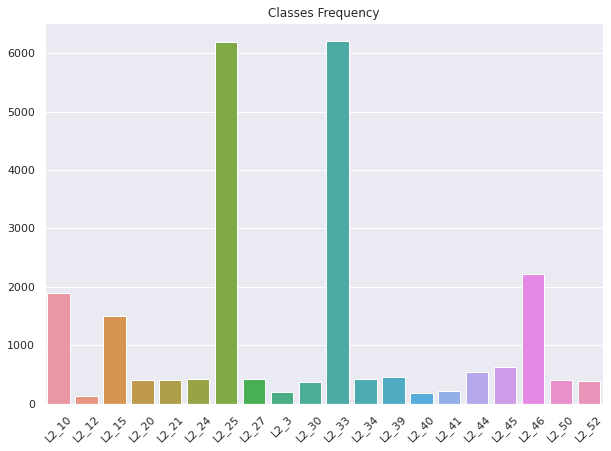

In [ ]:
import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize':(10,7)})
plt.xticks(rotation = 45)
plt.title("Classes Frequency")
sns.barplot(data=pd.DataFrame(class_freq, index = [0]))
plt.show()

# 실사 이미지 처리 후도 마찬가지로 데이터 불균형 문제가 심각하다.

**Mission #1 - 데이터 분포 문제 해결**

In [ ]:
# UnderSampling (1000)

import random
path='/content/drive/MyDrive/folder'
class_freq = {}
pass_delete=[]
for n in class_names:
  num = len(os.listdir(path +  '/' + n)) - 1000
  print('%s 계산된 값: %d' % (n, num))
  class_freq[n] = num
  if num > 0:
    delete = num
  else:
    delete = 0
  print('삭제될 이미지 개수: ', delete)
  pass_delete.append((path+'/'+n, delete))

L2_10 계산된 값: 893
삭제될 이미지 개수:  893
L2_12 계산된 값: -875
삭제될 이미지 개수:  0
L2_15 계산된 값: 508
삭제될 이미지 개수:  508
L2_20 계산된 값: -590
삭제될 이미지 개수:  0
L2_21 계산된 값: -590
삭제될 이미지 개수:  0
L2_24 계산된 값: -579
삭제될 이미지 개수:  0
L2_25 계산된 값: 5189
삭제될 이미지 개수:  5189
L2_27 계산된 값: -574
삭제될 이미지 개수:  0
L2_3 계산된 값: -796
삭제될 이미지 개수:  0
L2_30 계산된 값: -636
삭제될 이미지 개수:  0
L2_33 계산된 값: 5204
삭제될 이미지 개수:  5204
L2_34 계산된 값: -581
삭제될 이미지 개수:  0
L2_39 계산된 값: -546
삭제될 이미지 개수:  0
L2_40 계산된 값: -820
삭제될 이미지 개수:  0
L2_41 계산된 값: -790
삭제될 이미지 개수:  0
L2_44 계산된 값: -453
삭제될 이미지 개수:  0
L2_45 계산된 값: -369
삭제될 이미지 개수:  0
L2_46 계산된 값: 1214
삭제될 이미지 개수:  1214
L2_50 계산된 값: -588
삭제될 이미지 개수:  0
L2_52 계산된 값: -619
삭제될 이미지 개수:  0


In [ ]:
# 선정 데이터 삭제

import random
for path, num in pass_delete:
  img_names = os.listdir(path)
  img_names = random.sample(img_names, num)
  for image in img_names:
    f = os.path.join(path, image)
    os.remove(f)

In [ ]:
# 삭제 후 분포 확인

import os
path = '/content/drive/MyDrive/folder'
class_freq = {}
for n in class_names:
  freq = len(os.listdir(path +  '/' + n))
  print('%s 클래스 이미지 개수: %d' % (n, freq))
  class_freq[n] = freq

L2_10 클래스 이미지 개수: 1000
L2_12 클래스 이미지 개수: 125
L2_15 클래스 이미지 개수: 1000
L2_20 클래스 이미지 개수: 410
L2_21 클래스 이미지 개수: 410
L2_24 클래스 이미지 개수: 421
L2_25 클래스 이미지 개수: 1000
L2_27 클래스 이미지 개수: 426
L2_3 클래스 이미지 개수: 204
L2_30 클래스 이미지 개수: 364
L2_33 클래스 이미지 개수: 1000
L2_34 클래스 이미지 개수: 419
L2_39 클래스 이미지 개수: 454
L2_40 클래스 이미지 개수: 180
L2_41 클래스 이미지 개수: 210
L2_44 클래스 이미지 개수: 547
L2_45 클래스 이미지 개수: 631
L2_46 클래스 이미지 개수: 1000
L2_50 클래스 이미지 개수: 412
L2_52 클래스 이미지 개수: 381


In [ ]:
# OverSampling (1000, Data Augmentation)

import cv2
import glob
from PIL import Image
import PIL.ImageOps

In [ ]:
file_path='/content/drive/MyDrive/folder'
class_freq = {}
over_class=[]
for n in class_names:
  num_o = 1000 - len(os.listdir(file_path +  '/' + n))
  class_freq[n] = num_o
  if num_o > 0:
    add_sam = num_o
  else:
    add_sam = 0
  print('생성할 이미지 개수: ', add_sam)
  over_class.append((file_path+'/'+n, add_sam))

생성할 이미지 개수:  0
생성할 이미지 개수:  875
생성할 이미지 개수:  0
생성할 이미지 개수:  590
생성할 이미지 개수:  590
생성할 이미지 개수:  579
생성할 이미지 개수:  0
생성할 이미지 개수:  574
생성할 이미지 개수:  796
생성할 이미지 개수:  636
생성할 이미지 개수:  0
생성할 이미지 개수:  581
생성할 이미지 개수:  546
생성할 이미지 개수:  820
생성할 이미지 개수:  790
생성할 이미지 개수:  453
생성할 이미지 개수:  369
생성할 이미지 개수:  0
생성할 이미지 개수:  588
생성할 이미지 개수:  619


In [ ]:
for file_path, num_o in over_class:
  if num_o == 0:
    continue
  file_names = os.listdir(file_path)
  # 생성할 이미지 개수
  total_origin_image_num = len(file_names)
  augment_cnt = 1

  for i in range(num_o):
    change_picture_index = random.randrange(total_origin_image_num)
    file_name = file_names[change_picture_index]
    
    origin_image_path = file_path + '/' + file_name
    print(origin_image_path)
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1,4)

    if(random_augment == 1):
        # 이미지 좌우 반전
        print("invert")
        inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT).convert('RGB')
        inverted_image.save(file_path + '/inverted_' + str(augment_cnt) + '.png')
        
    elif(random_augment == 2):
        # 이미지 기울이기
        print("rotate")
        rotated_image = image.rotate(random.randrange(-20, 20)).convert('RGB')
        rotated_image.save(file_path + '/rotated_' + str(augment_cnt) + '.png')

    elif(random_augment == 3):
        # 이미지 기울이고 좌우 반전
        print("rotate")
        rotated_image_2 = image.rotate(random.randrange(-20, 20)).convert('RGB')
        rotated_image_2 = rotated_image_2.transpose(Image.FLIP_LEFT_RIGHT)
        rotated_image_2.save(file_path + '/rotated2_' + str(augment_cnt) + '.png')
        
    augment_cnt += 1

/content/drive/MyDrive/folder/L2_12/yhyctlfhwjjxtsyhiwav.jpg
invert
/content/drive/MyDrive/folder/L2_12/itjlezgqbipbyqzidvpk.jpg
invert
/content/drive/MyDrive/folder/L2_12/gdbdzcfszkdwdxtmnceu.jpg
rotate
/content/drive/MyDrive/folder/L2_12/ypaattyyjkylwoslbzla.jpg
invert
/content/drive/MyDrive/folder/L2_12/dzmvaautfchwlzskaasg.jpg
rotate
/content/drive/MyDrive/folder/L2_12/aywlfdzzqwxrnllirtea.jpg
invert
/content/drive/MyDrive/folder/L2_12/fqcbjhqxklsolzgegfkj.jpg
rotate
/content/drive/MyDrive/folder/L2_12/vzxbytmkyzpmcaidkzgc.jpg
invert
/content/drive/MyDrive/folder/L2_12/rxymxcbuzftzaxravwsh.jpg
rotate
/content/drive/MyDrive/folder/L2_12/zmuapisxghmdrwwrpkjy.jpg
invert
/content/drive/MyDrive/folder/L2_12/jdvhvhplgjtphgzoiymr.jpg
rotate
/content/drive/MyDrive/folder/L2_12/ypaattyyjkylwoslbzla.jpg
rotate
/content/drive/MyDrive/folder/L2_12/fzcjmnzgtrboamalmqru.jpg
invert
/content/drive/MyDrive/folder/L2_12/jawyirxmjqomuiqmmbqr.png
rotate
/content/drive/MyDrive/folder/L2_12/qzlgqnoxciuy

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/drive/MyDrive/folder/L2_41/owwkcgviwpqjgiqwqlaj.jpg
rotate
/content/drive/MyDrive/folder/L2_41/xpafjadwwhpwlsomkiuj.jpg
invert
/content/drive/MyDrive/folder/L2_41/vaxkkhqcojzzfacrwvfm.png
rotate
/content/drive/MyDrive/folder/L2_41/vtwayaemuawpqxbjfbia.jpg
rotate
/content/drive/MyDrive/folder/L2_41/eaijozsykdxbsqxxzxju.jpg
invert
/content/drive/MyDrive/folder/L2_41/ccprzlttplizihydanht.jpg
invert
/content/drive/MyDrive/folder/L2_41/kfhnzirxrufasalebahd.jpg
rotate
/content/drive/MyDrive/folder/L2_41/egnjwsfxgviulqedskag.jpg
rotate
/content/drive/MyDrive/folder/L2_41/kvyuymyjlwvhszylqmml.jpg
rotate
/content/drive/MyDrive/folder/L2_41/obwtgqsnstfogxrmlsca.jpg
invert
/content/drive/MyDrive/folder/L2_41/zdisqeqdhzoghgjabpkd.jpg
rotate
/content/drive/MyDrive/folder/L2_41/vfzqksomcfjvspabmclc.png
rotate
/content/drive/MyDrive/folder/L2_41/pnfztlmerrrkqmeqqmme.jpg
rotate
/content/drive/MyDrive/folder/L2_41/ujvbyttekpdkkdqzeqyo.jpg
rotate
/content/dri

In [ ]:
# 오버샘플링 후 분포 확인

import os
path = '/content/drive/MyDrive/folder'
class_freq = {}
for n in class_names:
  freq = len(os.listdir(path +  '/' + n))
  print('%s 클래스 이미지 개수: %d' % (n, freq))
  class_freq[n] = freq

L2_10 클래스 이미지 개수: 1000
L2_12 클래스 이미지 개수: 1000
L2_15 클래스 이미지 개수: 1000
L2_20 클래스 이미지 개수: 1000
L2_21 클래스 이미지 개수: 1000
L2_24 클래스 이미지 개수: 1000
L2_25 클래스 이미지 개수: 1000
L2_27 클래스 이미지 개수: 1000
L2_3 클래스 이미지 개수: 1000
L2_30 클래스 이미지 개수: 1000
L2_33 클래스 이미지 개수: 1000
L2_34 클래스 이미지 개수: 1000
L2_39 클래스 이미지 개수: 1000
L2_40 클래스 이미지 개수: 1000
L2_41 클래스 이미지 개수: 1000
L2_44 클래스 이미지 개수: 1000
L2_45 클래스 이미지 개수: 1000
L2_46 클래스 이미지 개수: 1000
L2_50 클래스 이미지 개수: 1000
L2_52 클래스 이미지 개수: 1000


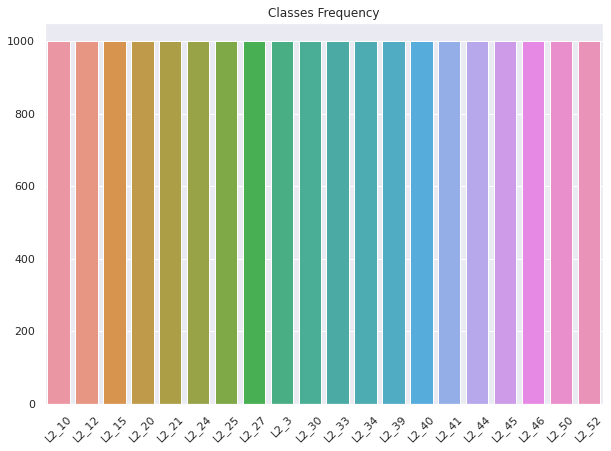

In [ ]:
# 오버샘플링 후 분포 시각화

import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize':(10,7)})
plt.xticks(rotation = 45)
plt.title("Classes Frequency")
sns.barplot(data=pd.DataFrame(class_freq, index = [0]))
plt.show()

In [ ]:
# !zip -r /content/drive/MyDrive/dataset2.zip /content/drive/MyDrive/folder/

In [ ]:
# # 생성 파일 삭제 코드

# import os

# for a, b in over_class:
#   aa = os.listdir(a)
#   for i in aa:
#     if i.startswith('noiseAdded') or i.startswith('inverted') or i.startswith('rotated') or i.startswith('rotated2'):
#       os.remove(a+'/'+i)

**Mission #3 - 모델 구축**

In [ ]:
# ImageFolder 메소드로 폴더별 클래스 구분

path = '/content/drive/MyDrive/folder'

IMAGENET_DEFAULT_MEAN = (0.485, 0.456, 0.406)
IMAGENET_DEFAULT_STD = (0.229, 0.224, 0.225)
transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
            transforms.RandomRotation(degrees=(-90, 90)),
            transforms.Resize(256), 
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=IMAGENET_DEFAULT_MEAN, std=IMAGENET_DEFAULT_STD)
        ])

image_datasets = datasets.ImageFolder(path, transform)
print(image_datasets)
class_names = image_datasets.classes # 각 클래스의 이름을 class_names에 저장

In [ ]:
#train dataset과 validation dataset으로 분할
gen = torch.Generator()
gen.manual_seed(11)
dataset_size = image_datasets.__len__()
train_count = int(dataset_size * 0.8)
val_count = dataset_size - train_count
train_dataset, valid_dataset = torch.utils.data.random_split(image_datasets, [train_count, val_count], generator = gen)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=128, shuffle=False)

In [ ]:
from tqdm.auto import tqdm
import torch.nn as nn # 신경망들이 포함됨
import torch.nn.init as init # 텐서에 초기값을 줌

class CNNclassification(torch.nn.Module):
    def __init__(self):
        super(CNNclassification, self).__init__()
        self.layer1 = torch.nn.Sequential(
            #224
            nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2))
            #112
        self.layer2 = torch.nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.Dropout(),
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
            #56
        
        self.layer3 = torch.nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
            #28
        
        self.layer4 = torch.nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), #cnn layer
            #28
            nn.ReLU(), #activation function
            nn.Dropout(),
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
            #14

        
        self.fc_layer = nn.Linear(12544, 20, bias=True) #fully connected layer(output layer)  

        # 가중치 초기화
        torch.nn.init.kaiming_uniform_(self.fc_layer.weight)

        
    def forward(self, x):
        
        out = self.layer1(x) #1층
        
        out = self.layer2(out) #2층
         
        out = self.layer3(out) #3층
        
        out = self.layer4(out) #4층
        
        out = out.view(out.size(0), -1)

        out = torch.flatten(out, start_dim=1) # N차원 배열 -> 1차원 배열
        
        out = self.fc_layer(out)
        return out

In [ ]:
CFG = {
    'IMG_SIZE':224, #이미지 사이즈
    'EPOCHS':30, #에포크
    'LEARNING_RATE':0.001, #학습률
    'BATCH_SIZE':128 #배치사이즈
}


In [ ]:
import torch.optim as optim # 최적화 알고리즘들이 포함
from torch.optim import lr_scheduler
model = CNNclassification().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = CFG["LEARNING_RATE"])
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
# !pip install torchsummary

from torchsummary import summary
summary(model, input_size=(3, 224, 224), device=device.type)

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import gc

from sklearn.metrics import classification_report
import pandas as pd
from tqdm import tqdm

In [ ]:
result_train = []
result_val = []
loss_train = [] 

def train(model, optimizer, train_loader, scheduler, device): 
    model.to(device)
    n = len(train_loader)
    
    #Loss Function 정의
    criterion = nn.CrossEntropyLoss().to(device)
    best_acc = 0
    
    for epoch in range(1,CFG["EPOCHS"]+1): #에포크 설정
        model.train() #모델 학습
        running_loss = 0.0
            
        for img, label in tqdm(iter(train_loader)):
            img, label = img.to(device), label.to(device) #배치 데이터
            optimizer.zero_grad() #배치마다 optimizer 초기화
        
            # Data -> Model -> Output
            logit = model(img) #예측값 산출
            loss = criterion(logit, label) #손실함수 계산
            
            # 역전파
            loss.backward() #손실함수 기준 역전파 
            optimizer.step() #가중치 최적화
            running_loss += loss.item()
              
        print('[%d] Train loss: %.10f' %(epoch, running_loss / len(train_loader)))
        loss_train.append(running_loss / n)
        if scheduler is not None:
            scheduler.step()
        torch.save(model.state_dict(), './model_state.pth')
        #Validation set 평가
        model.eval() #evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수
        
        total_preds = []
        total_labels = []

        # vali_loss = 0.0
        # correct = 0
        with torch.no_grad(): #파라미터 업데이트 안하기 때문에 no_grad 사용
            for img, label in tqdm(iter(val_loader)):
                img, label = img.to(device), label.to(device)
                logit = model(img)
                total_preds.append(logit)
                total_labels.append(label)
        total_preds = torch.cat(total_preds).argmax(dim=1).cpu().numpy()
        total_labels = torch.cat(total_labels).cpu().numpy()

        result = classification_report(total_labels, total_preds, output_dict=True)
        print('[%d] Validation' % (epoch))
        print(result)
        result_val.append(result)

In [ ]:
train(model, optimizer, train_loader, scheduler, device)

  0%|          | 0/125 [00:00<?, ?it/s]